<ipython-input-13-e57246e52dad>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


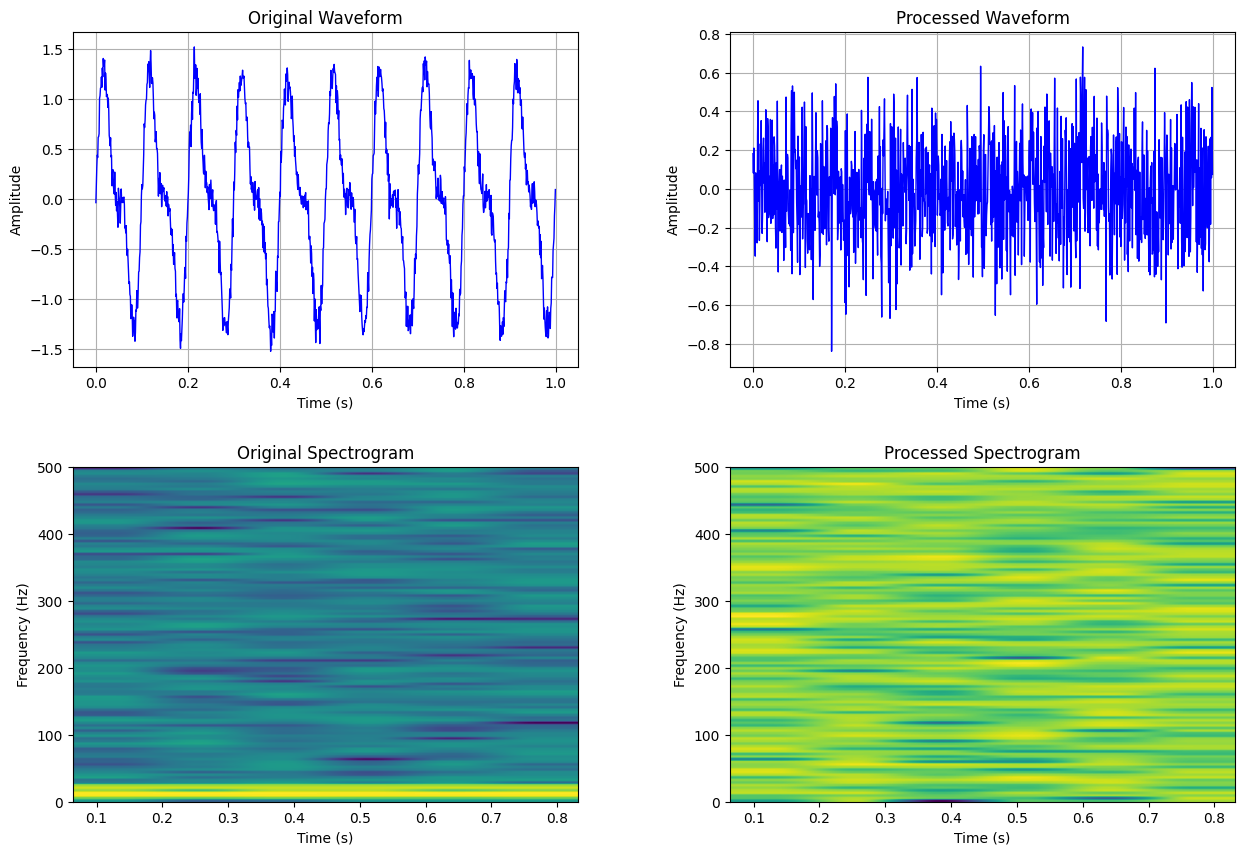

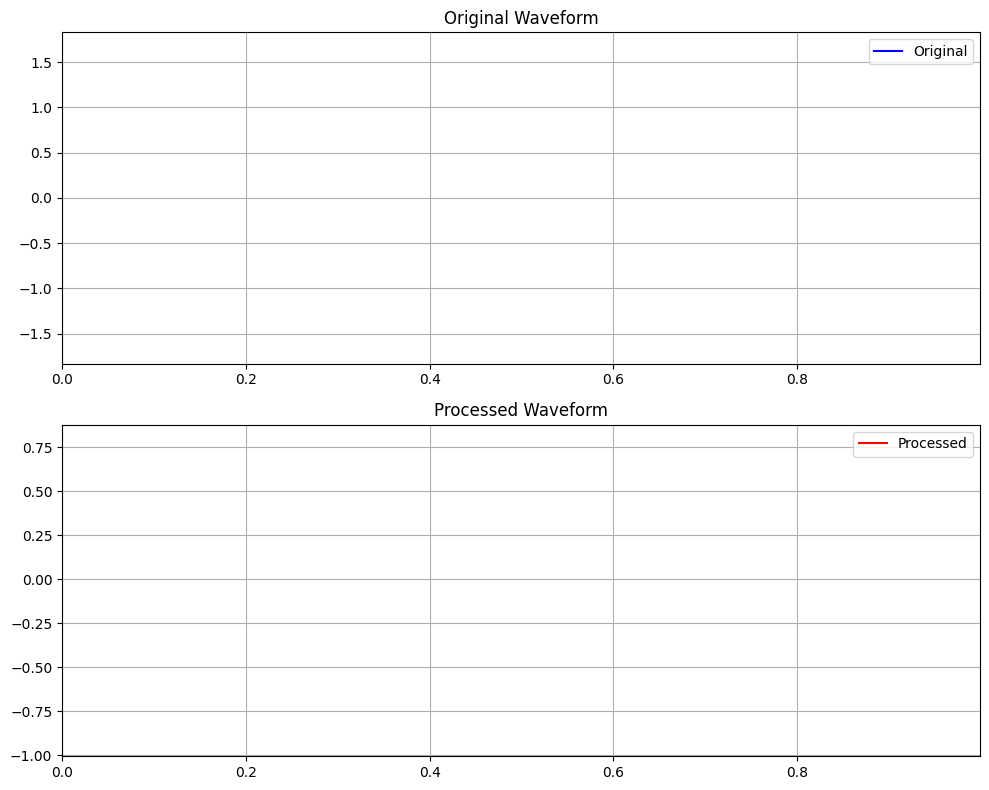

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

class WaveformVisualizer:
    def __init__(self, processor, input_data, sampling_rate=1000):
        self.processor = processor
        self.input_data = input_data
        self.sampling_rate = sampling_rate
        self.time = np.arange(input_data.shape[1]) / sampling_rate

class SecureWaveformProcessor(nn.Module):  # Assuming it's a PyTorch module
    def __init__(self, input_size, hidden_size, sampling_rate=1000):
        super(SecureWaveformProcessor, self).__init__()
        # Define your layers here (e.g., using nn.Linear, nn.Conv1d, etc.)
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, input_size)
        self.sampling_rate = sampling_rate

    def forward(self, x):
        # Define the forward pass logic of your processor
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

    def plot_waveforms(self):
        """Plot original and processed waveforms with their spectrograms"""
        processed_data = self.forward(input_data)
        self.time = np.arange(input_data.shape[1]) / self.sampling_rate
        self.input_data = input_data

        # Create a figure with subplots
        fig = plt.figure(figsize=(15, 10))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

        # Original waveform
        ax1 = fig.add_subplot(gs[0, 0])
        self._plot_waveform(self.input_data[0], ax1, "Original Waveform")

        # Processed waveform
        ax2 = fig.add_subplot(gs[0, 1])
        self._plot_waveform(processed_data[0], ax2, "Processed Waveform")

        # Original spectrogram
        ax3 = fig.add_subplot(gs[1, 0])
        self._plot_spectrogram(self.input_data[0], ax3, "Original Spectrogram")

        # Processed spectrogram
        ax4 = fig.add_subplot(gs[1, 1])
        self._plot_spectrogram(processed_data[0], ax4, "Processed Spectrogram")

        plt.tight_layout()
        return fig

    def _plot_waveform(self, data, ax, title):
        """Helper method to plot individual waveforms"""
        data_np = data.detach().numpy()
        ax.plot(self.time, data_np, 'b-', linewidth=1)
        ax.set_title(title)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude')
        ax.grid(True)

    def _plot_spectrogram(self, data, ax, title):
        """Helper method to plot spectrograms"""
        data_np = data.detach().numpy()
        ax.specgram(data_np, Fs=self.sampling_rate, cmap='viridis')
        ax.set_title(title)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')

    def animate_processing(self, frames=50):
        """Create an animation of the waveform processing"""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

        processed_data = self.forward(self.input_data)
        data_original = self.input_data[0].detach().numpy()
        data_processed = processed_data[0].detach().numpy()

        line1, = ax1.plot([], [], 'b-', label='Original')
        line2, = ax2.plot([], [], 'r-', label='Processed')

        def init():
            ax1.set_xlim(0, self.time[-1])
            ax1.set_ylim(data_original.min()*1.2, data_original.max()*1.2)
            ax2.set_xlim(0, self.time[-1])
            ax2.set_ylim(data_processed.min()*1.2, data_processed.max()*1.2)

            ax1.set_title('Original Waveform')
            ax2.set_title('Processed Waveform')
            ax1.grid(True)
            ax2.grid(True)
            ax1.legend()
            ax2.legend()

            return line1, line2

        def animate(frame):
            idx = int((frame / frames) * len(self.time))
            line1.set_data(self.time[:idx], data_original[:idx])
            line2.set_data(self.time[:idx], data_processed[:idx])
            return line1, line2

        anim = FuncAnimation(fig, animate, frames=frames,
                           init_func=init, blit=True,
                           interval=50)

        plt.tight_layout()
        return anim

# Example usage
if __name__ == "__main__":
    # Generate sample data
    input_size = 1000
    batch_size = 32
    sampling_rate = 1000

    processor = SecureWaveformProcessor(input_size=input_size, hidden_size=64, sampling_rate=sampling_rate)

    # Create synthetic waveform data
    t = np.linspace(0, 10, input_size)
    base_signal = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 2 * t)
    noise = np.random.normal(0, 0.1, input_size)
    signal = base_signal + noise

    # Convert to torch tensor and add batch dimension
    input_data = torch.tensor(np.tile(signal, (batch_size, 1)), dtype=torch.float32)

    # Initialize processor
    processor = SecureWaveformProcessor(input_size=input_size, hidden_size=64)

    # Create visualizer
    visualizer = WaveformVisualizer(processor, input_data)

    # Generate static plots
    fig_static = processor.plot_waveforms()
    plt.show()

    # Generate animation
    anim = processor.animate_processing()
    plt.show()